In [13]:
# import quandl
!pip install scikit-learn
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

# df = quandl.get("WIKI/AMZN")
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
df=df.iloc[::-1]
df.index = df['Date']
del df['Date']
df.info()
df = df[['Close']]
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1655 non-null   float64
 1   High        1655 non-null   float64
 2   Low         1655 non-null   float64
 3   Close       1655 non-null   float64
 4   Volume      1655 non-null   object 
 5   Market Cap  1655 non-null   object 
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


In [9]:
df.head()

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [14]:
df = df[['Close']]

forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(columns=['Prediction']))  # Specify 'columns' explicitly

X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9020768601211158
[5812.71415703 5824.98125169 5879.72177745 6643.09926433 6889.54851828
 7116.65587371 6927.66633099 6985.98732269 6838.24081039 6820.00627248
 6964.98438327 7337.70965785 7362.50223132 7333.98154382 7237.88725159
 6741.19910965 7017.00572355 7206.52433855 7054.04078367 7019.82334108
 7512.91871307 7484.22576948 7899.94124341 8267.7203073  8650.60869139
 8809.65028183 9021.51297297 9055.29977534 8582.02615812 8731.66748745]


     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     -------------------------------------- 158.4/158.4 kB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.6 MB 9.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/7.6 MB 7.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.6 MB 6.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.6 MB 5.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.6 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.6 MB 4.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB 4.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.6 MB 4.3 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.6 MB 4.1 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/7.6 MB 4.0 MB/s eta 0:00:02
   --------- -----

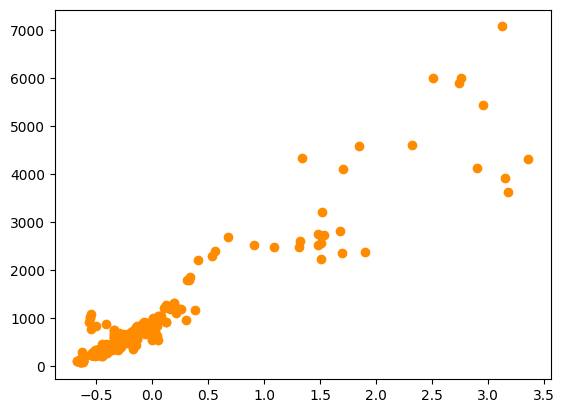

In [16]:
!pip install matplotlib
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_test, color='darkorange', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [17]:
clf.score(X_test,y_test)

0.9020768601211158

In [18]:
# dict_new = {
#     'Date': X_train,
#     'Close': y_train
# }
# df1=pd.DataFrame(dict_new).set_index('Date')
# df1

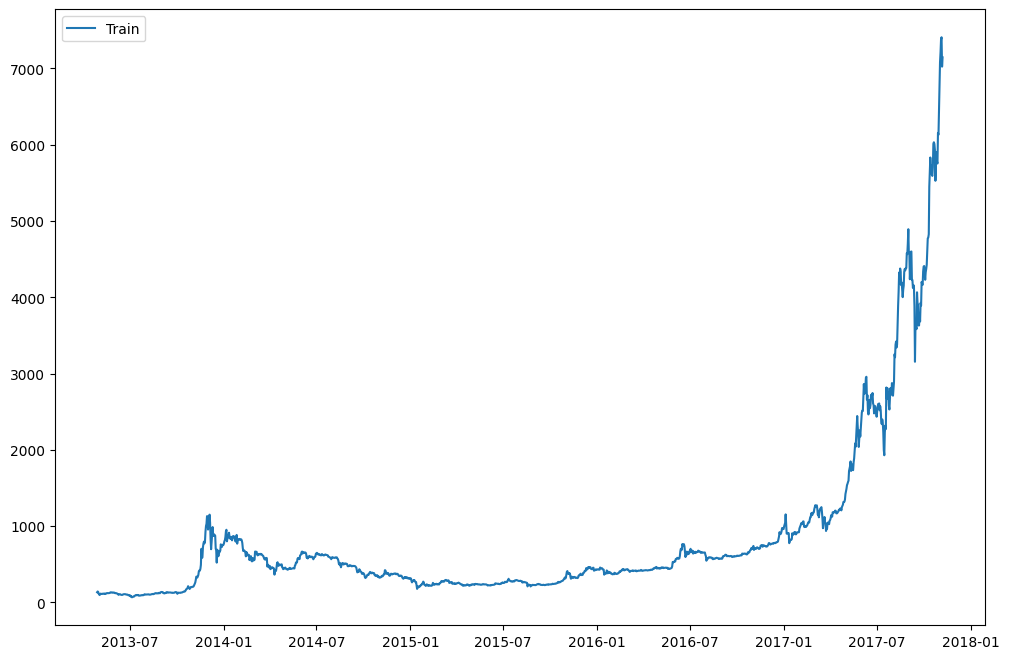

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming 'test' contains the actual values and 'y_hat_avg' holds predicted values
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)


NameError: name 'test' is not defined